In [14]:
""""
To-do
[*] Add models for binary classification 
[*] Take multiple readings and compute the average result
[*] Add time stats (Build time)
[*] Create a table with model_name, predicition
[*] Write a function to plot using matplotlib
"""

import mysql.connector
import pandas as pd
# Import the ML library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,PassiveAggressiveRegressor,LinearRegression,ARDRegression,HuberRegressor,ElasticNetCV,OrthogonalMatchingPursuit,ElasticNet,RidgeClassifier,RidgeCV,SGDClassifier,BayesianRidge, Perceptron,RANSACRegressor,LassoLars,Lasso,LassoCV,PassiveAggressiveClassifier
from sklearn.metrics import balanced_accuracy_score,accuracy_score,mean_squared_error
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier,VotingClassifier,AdaBoostClassifier
import numpy as np
import time
import matplotlib.pyplot as plt

#function defs:
def model_testing(model):
    start = time.time()
    #Split the data using test_train_split
    x_train,x_test,y_train,y_test = train_test_split(heart_data,heart_target,test_size=0.5)
    #Fit the model using the data which was splitted
    model.fit(x_train,y_train)
    #Print Score of the model
    score = model.score(x_test,y_test)
    stop = time.time()
    timetaken = stop-start
    return (score,timetaken)
    #print(y_pred)
    
def plotGraph(keys, values, label, title):
    names = keys
    y_pos = np.arange(len(keys))
    data = values
    plt.rcParams["figure.figsize"] = (15,7)
    plt.barh(y_pos, data, align='center', alpha=0.6)
    plt.yticks(y_pos, names)
    plt.xlabel(label)
    plt.title(title)
    plt.show()
    
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="pass")
mycursor = mydb.cursor()
# Getting the table data
mycursor.execute("SELECT * FROM world.heart")
# Storing all the rows using fetchall into res var
res = mycursor.fetchall()
#create a dataframe using pandas
df = pd.DataFrame(res)
#Exclude the last column
heart_data = df.iloc[:,:-1]
#Exclude all columns except the last one
heart_target = df_target=df.iloc[:,-1]

alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]
#get the models
model_dict = {
    "VotingClassifier": VotingClassifier(estimators=[('mnb',MultinomialNB()),('lr',LogisticRegression(max_iter=1000)),('rf',RandomForestClassifier()),('svm',LinearSVC(max_iter=1000))],voting='hard'),
    "RandomForest": RandomForestClassifier(n_estimators=30, max_depth=9),
    "AdaBoostClassifier": AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6),
    "BaggingClassifier": BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10),
    "DecisionTreeClassifier" : DecisionTreeClassifier(),
    "LinearSVC" : LinearSVC(C=0.0001),
    "KNN": KNeighborsClassifier(algorithm = 'brute', n_jobs=-1),
    "MultinomialNB": MultinomialNB(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "LinearRegression": LinearRegression(),
    "ARDRegression": ARDRegression(),
    "LogisticRegressionCV": LogisticRegressionCV(n_jobs=-1,max_iter=1000),
    "ElasticNetCV": ElasticNetCV(alphas=alphas, cv=5),
    "ElasticNet": ElasticNet(alpha=0.01),
    "BayesianRidge": BayesianRidge(),
    "RANSACRegressor": RANSACRegressor(base_estimator = LinearRegression(),min_samples=10,residual_threshold=5, random_state=0),
    "LassoLars": LassoLars(alpha=0.1, fit_intercept=True,fit_path=False, max_iter=5000, normalize=True),
    "RidgeClassifier":RidgeClassifier(),
    "RidgeCV": RidgeCV(),
    "Lasso": Lasso(),
    "LassoCV": LassoCV(cv=5),
    "PassiveAggressiveClassifier": PassiveAggressiveClassifier(),
    "HuberRegressor": HuberRegressor(max_iter=2000),
    "Perceptron": Perceptron(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(C=1, fit_intercept=False,random_state=0, average=True, max_iter=100)
}

model_stats_score = {}
model_stats_timetaken = {}
for modelname in model_dict:
    #print(modelname)
    preds = []
    timetaken = []
    for i in range(0,20):
        model = model_dict[modelname]
        score,timeforfit=model_testing(model)
        timetaken.append(timeforfit)
        preds.append(score)
    prediction_mean = (sum(preds)/len(preds))
    model_stats_score[modelname] = prediction_mean
    timetaken_mean =  (sum(timetaken)/len(timetaken))
    model_stats_timetaken[modelname] = timetaken_mean
    #print("average for {} : {} and time taken: {}".format(modelname,prediction_mean,timetaken_mean))


C:\Users\vgnsh\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\vgnsh\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\vgnsh\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\vgnsh\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\vgnsh\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

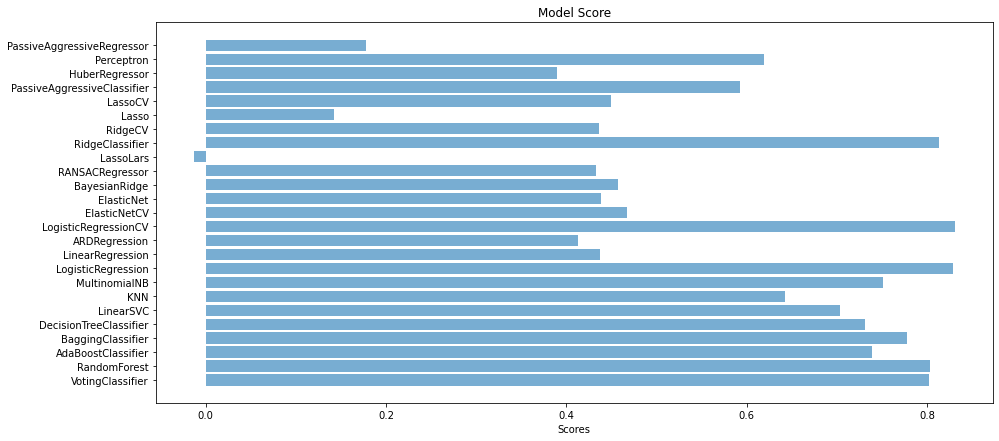

In [15]:
plotGraph(model_stats_score.keys(), model_stats_score.values(), 'Scores', 'Model Score')

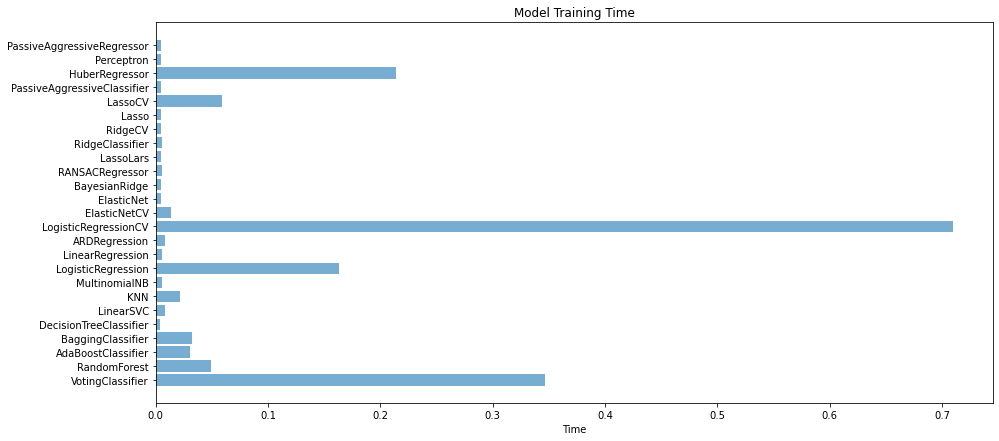

In [16]:
plotGraph(model_stats_timetaken.keys(), model_stats_timetaken.values(), 'Time', 'Model Training Time')

In [17]:
from tabulate import tabulate
headers = ['Model Name','Model Score', 'Model Training Time']
modelnames = list(model_stats_timetaken.keys())
modeltimes = list(model_stats_timetaken.values())
table = []
modescores = list(model_stats_score.values())
for i in range(0,len(modelnames)-1):
    table.append ([modelnames[i],modescores[i],modeltimes[i]])
print(tabulate(table, headers, tablefmt="github"))

| Model Name                  |   Model Score |   Model Training Time |
|-----------------------------|---------------|-----------------------|
| VotingClassifier            |     0.802303  |            0.3463     |
| RandomForest                |     0.802961  |            0.0489501  |
| AdaBoostClassifier          |     0.738487  |            0.0305995  |
| BaggingClassifier           |     0.777961  |            0.0324498  |
| DecisionTreeClassifier      |     0.73125   |            0.00425001 |
| LinearSVC                   |     0.703947  |            0.00814999 |
| KNN                         |     0.642434  |            0.0216999  |
| MultinomialNB               |     0.751645  |            0.00570014 |
| LogisticRegression          |     0.828289  |            0.1636     |
| LinearRegression            |     0.437528  |            0.00534977 |
| ARDRegression               |     0.413295  |            0.00844989 |
| LogisticRegressionCV        |     0.830592  |            0.709